# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_delta_others_plus.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,film_deposition_type_MGC,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,post_process_annealing
0,4.00,299.00,90.000,3.32,0.110000,1,1,0,132.0,0,0,0,0,1
1,4.00,299.00,90.000,3.32,0.290000,1,1,0,132.0,0,0,1,0,1
2,4.00,299.00,90.000,3.32,0.230000,1,1,0,132.0,0,0,1,0,1
3,4.00,299.00,90.000,3.32,0.730000,1,1,0,132.0,0,0,1,0,1
4,4.00,299.00,90.000,3.32,1.860000,1,1,0,132.0,0,0,1,0,1
5,4.00,299.00,90.000,3.32,0.210000,1,1,0,132.0,0,0,1,0,1
6,4.00,299.00,90.000,3.32,0.340000,1,1,0,132.0,0,0,1,0,1
7,4.00,299.00,90.000,3.32,0.240000,1,1,0,132.0,0,0,1,0,1
8,4.00,299.00,90.000,3.32,1.970000,1,1,0,132.0,0,0,1,0,1
9,4.00,299.00,90.000,3.32,0.690000,1,1,0,132.0,0,0,1,0,1


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'film_deposition_type_MGC',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent',
 'post_process_annealing']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPPPDTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.613
R² score for test set: 0.274


## Polynomial regression

Degree 1: R² train = 0.613, R² test = 0.274
Degree 2: R² train = -0.074, R² test = -4.681
Degree 3: R² train = 0.830, R² test = -1.716
Degree 4: R² train = 0.830, R² test = -246232677708940.562
Degree 5: R² train = 0.826, R² test = -184133952657003.719
Degree 6: R² train = 0.811, R² test = -988926189867042.000


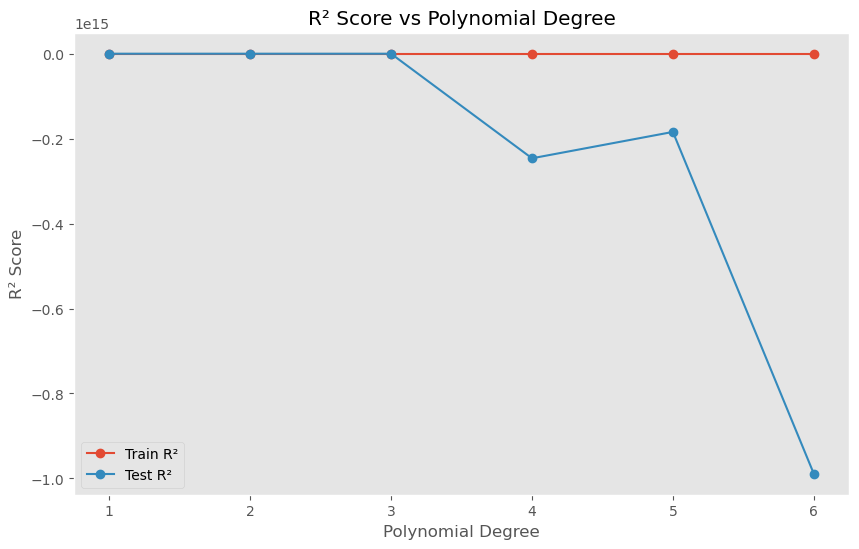

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.613, R² test = 0.277
Alpha 0.2: R² train = 0.613, R² test = 0.279
Alpha 0.3: R² train = 0.613, R² test = 0.280
Alpha 0.4: R² train = 0.613, R² test = 0.282
Alpha 0.5: R² train = 0.612, R² test = 0.283
Alpha 0.6: R² train = 0.612, R² test = 0.284
Alpha 0.7: R² train = 0.612, R² test = 0.285
Alpha 0.8: R² train = 0.612, R² test = 0.285
Alpha 0.9: R² train = 0.612, R² test = 0.286
Alpha 1.0: R² train = 0.612, R² test = 0.286


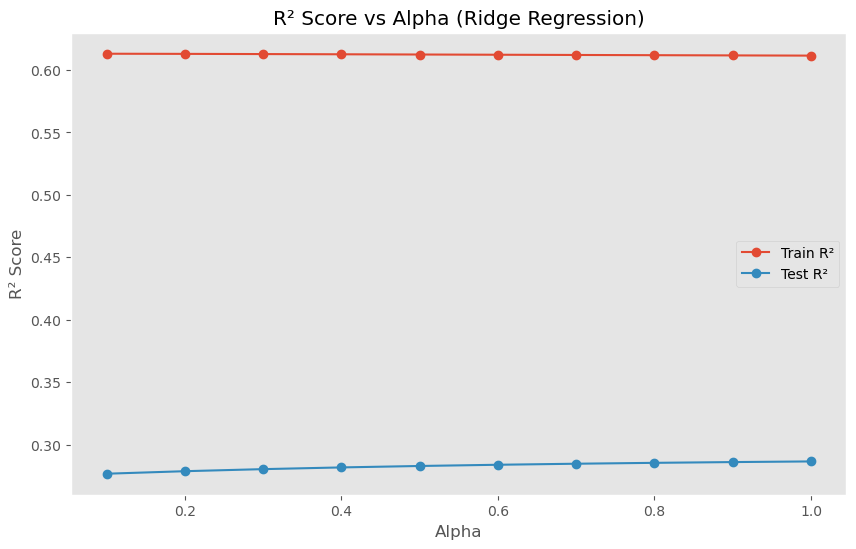

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.555, R² test = 0.192
Alpha 0.2: R² train = 0.545, R² test = 0.168
Alpha 0.3: R² train = 0.545, R² test = 0.169
Alpha 0.4: R² train = 0.545, R² test = 0.171
Alpha 0.5: R² train = 0.545, R² test = 0.173
Alpha 0.6: R² train = 0.544, R² test = 0.174
Alpha 0.7: R² train = 0.544, R² test = 0.176
Alpha 0.8: R² train = 0.544, R² test = 0.177
Alpha 0.9: R² train = 0.544, R² test = 0.178
Alpha 1.0: R² train = 0.544, R² test = 0.179


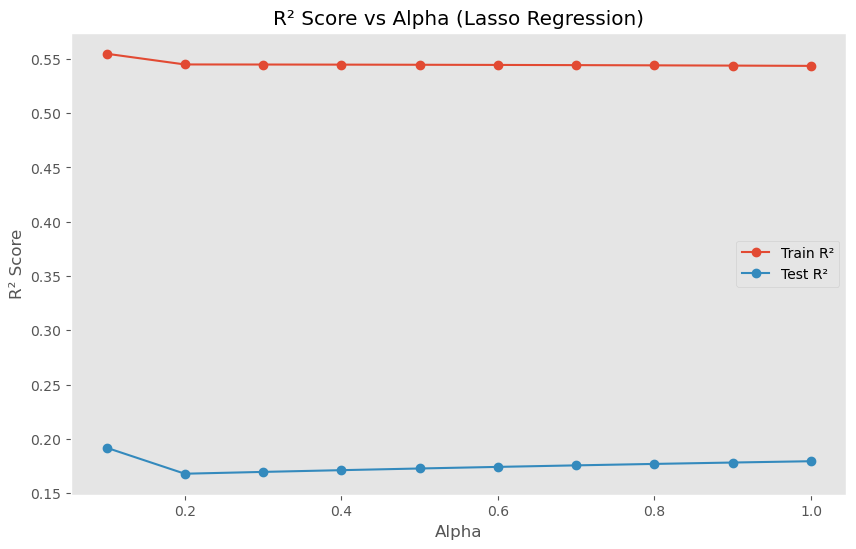

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.595851  0.272782
1     0.1       0.2  0.592636  0.272106
2     0.1       0.3  0.589208  0.269805
3     0.1       0.4  0.585068  0.265531
4     0.1       0.5  0.580752  0.259280
5     0.1       0.6  0.576897  0.251343
6     0.1       0.7  0.572190  0.241528
7     0.1       0.8  0.566986  0.228531
8     0.1       0.9  0.561563  0.212046
9     0.1       1.0  0.554761  0.191781
10    0.2       0.1  0.581991  0.245415
11    0.2       0.2  0.574673  0.236741
12    0.2       0.3  0.567180  0.224241
13    0.2       0.4  0.559645  0.206901
14    0.2       0.5  0.551439  0.183312
15    0.2       0.6  0.546645  0.171244
16    0.2       0.7  0.544905  0.166810
17    0.2       0.8  0.544897  0.167142
18    0.2       0.9  0.544887  0.167482
19    0.2       1.0  0.544877  0.167809
20    0.3       0.1  0.571697  0.225170
21    0.3       0.2  0.561920  0.210136
22    0.3       0.3  0.552998  0.187984
23    0.3       0.4  0.546160  0.169986


## Support Vector Regression (SVR)

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

# Visualize R² scores as heatmaps
# Pivot data for heatmaps
train_heatmap = results_df.pivot("C", "epsilon", "r2_train")
test_heatmap = results_df.pivot("C", "epsilon", "r2_test")

# Plot train heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Train R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()

# Plot test heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Test R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1  0.513231  0.191237
1   1      0.2  0.518521  0.224919
2   1      0.3  0.517551  0.246619
3   1      0.4  0.511052  0.253633
4   1      0.5  0.510507  0.252181
5   1      0.6  0.512605  0.238448
6   1      0.7  0.512094  0.206625
7   1      0.8  0.499717  0.167526
8   1      0.9  0.490789  0.132399
9   1      1.0  0.475905  0.067363
10  1      1.1  0.455306 -0.011280
11  2      0.1  0.578408  0.020496
12  2      0.2  0.582717  0.027274
13  2      0.3  0.590193  0.089377
14  2      0.4  0.589908  0.071498
15  2      0.5  0.585731  0.084086
16  2      0.6  0.596816  0.126540
17  2      0.7  0.595108  0.131589
18  2      0.8  0.591323  0.092247
19  2      0.9  0.583891  0.047216
20  2      1.0  0.569610 -0.015171
21  2      1.1  0.542623 -0.103532
22  3      0.1  0.588121  0.001911
23  3      0.2  0.595245  0.042037
24  3      0.3  0.601836  0.076209
25  3      0.4  0.607789  0.110300
26  3      0.5  0.607848  0.130884
27  3      0.6  0.61

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## Decision tree regression

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.348


## Random forest regression

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

y_train = y_train.values
y_test = y_test.values

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828567  0.359698
25           350  0.828545  0.359468
27           370  0.828595  0.358127
24           340  0.828469  0.356611
28           380  0.828500  0.356122
21           310  0.828615  0.354887
29           390  0.828451  0.354346
30           400  0.828498  0.353778
23           330  0.828496  0.353525
22           320  0.828640  0.352703


## Gradient bossting regression

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828567  0.359698
25           350  0.828545  0.359468
27           370  0.828595  0.358127
24           340  0.828469  0.356611
28           380  0.828500  0.356122
21           310  0.828615  0.354887
29           390  0.828451  0.354346
30           400  0.828498  0.353778
23           330  0.828496  0.353525
22           320  0.828640  0.352703


## K-nearest Neighbors Regression

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
15           16  0.595943  0.525103
14           15  0.622141  0.515299
13           14  0.639509  0.510732
12           13  0.664723  0.482904
11           12  0.687764  0.431059
10           11  0.703331  0.383113
9            10  0.716825  0.276008
8             9  0.734615  0.163810
7             8  0.734187  0.082923
6             7  0.762070 -0.116660


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train, y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

                            feature  importance
1                        polymer_mw    0.856912
7             solvent_boiling_point    0.443486
2                        polymer_mn    0.067684
9                insulating_polymer    0.000687
3                polymer_dispersity    0.000000
4                      post_process    0.000000
5         film_deposition_type_spin    0.000000
6          film_deposition_type_MGC    0.000000
8          blend_conjugated_polymer    0.000000
11  solution_treatment_poor_solvent    0.000000
12           post_process_annealing    0.000000
10           substrate_pretreat_sam   -0.000683
0            solution_concentration   -0.001563


In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
2              100            0.1          3  0.829381  0.350387
162            110            0.1          3  0.829451  0.350170
482            130            0.1          3  0.829555  0.349705
322            120            0.1          3  0.829518  0.349614
962            160            0.1          3  0.829674  0.348699
802            150            0.1          3  0.829656  0.348565
642            140            0.1          3  0.829627  0.348489
338            120            0.2          3  0.829771  0.348489
1122           170            0.1          3  0.829700  0.348310
498            130            0.2          3  0.829779  0.348190


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


KeyboardInterrupt: 

## Adaboost regression

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
0              100            0.1          1  0.771905  0.748389
321            120            0.1          2  0.771905  0.748389
1287           180            0.1          8  0.771905  0.748389
1288           180            0.1          9  0.771905  0.748389
1289           180            0.1         10  0.771905  0.748389
1290           180            0.1         11  0.771905  0.748389
1291           180            0.1         12  0.771905  0.748389
1292           180            0.1         13  0.771905  0.748389
1293           180            0.1         14  0.771905  0.748389
1294           180            0.1         15  0.771905  0.748389


In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature rankings
feature_names = [f"Feature {i+1}" for i in range(DPP_DTT_X.columns[i])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Print the features sorted by importance
print("Feature Importance (Ascending Order):")
print(importance_df)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'i' is not defined

In [22]:
DPP_DTT_X

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,post_process,film_deposition_type_spin,film_deposition_type_MGC,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,post_process_annealing
0,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,0,0,1
1,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
2,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
3,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
4,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
5,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
6,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
7,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
8,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1
9,4.00,299.00,90.000,3.32,1,1,0,132.0,0,0,1,0,1


Correlation Matrix:
                                 solution_concentration  polymer_mw  \
solution_concentration                         1.000000   -0.406824   
polymer_mw                                    -0.406824    1.000000   
polymer_mn                                    -0.461627    0.799186   
polymer_dispersity                             0.442676   -0.112855   
post_process                                  -0.290932    0.239916   
film_deposition_type_spin                     -0.296668    0.573155   
film_deposition_type_MGC                       0.296668   -0.573155   
solvent_boiling_point                         -0.357379    0.492225   
blend_conjugated_polymer                            NaN         NaN   
insulating_polymer                            -0.210391    0.188129   
substrate_pretreat_sam                         0.120164   -0.046837   
solution_treatment_poor_solvent               -0.085141    0.050048   
post_process_annealing                        -0.290932  

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


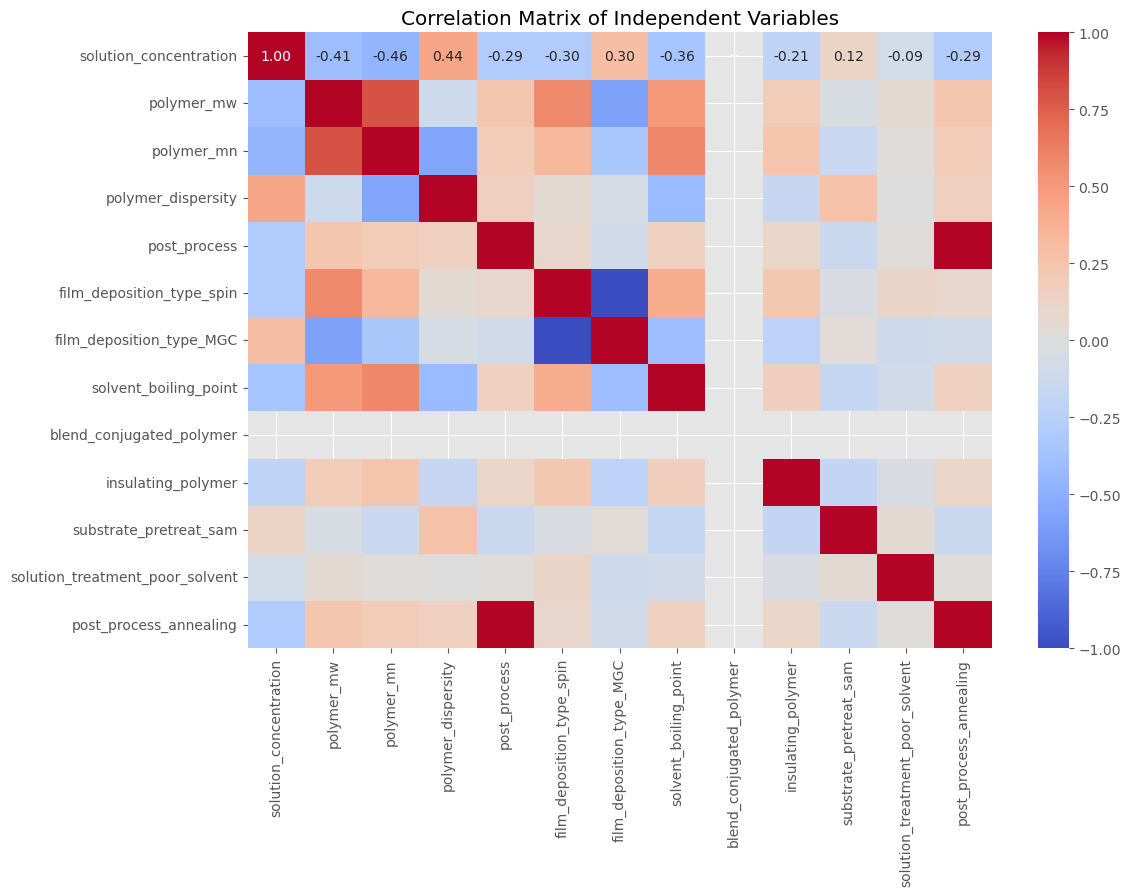

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


IndexError: index 13 is out of bounds for axis 1 with size 13

In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
correlation_matrix = DPP_DTT_X.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()

vif_data = pd.DataFrame()
vif_data['Feature'] = DPP_DTT_X.columns
vif_data['VIF'] = [
    variance_inflation_factor(DPP_DTT_X, i + 1) for i in range(DPP_DTT_X.shape[1])
]

In [29]:
print(importance_df)

       Feature  Importance
4    Feature 5    0.000000
8    Feature 9    0.000000
11  Feature 12    0.000000
12  Feature 13    0.000000
0    Feature 1    0.008545
2    Feature 3    0.009154
10  Feature 11    0.010162
5    Feature 6    0.021208
3    Feature 4    0.035599
6    Feature 7    0.039660
9   Feature 10    0.120738
7    Feature 8    0.135420
1    Feature 2    0.619513
